In [51]:
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv("trainingandtestdata/training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
data = data[[5, 0]]
data.head()

,5,0
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [13]:
data = data.rename(columns={5:'text', 0:'sentiment'})
data.head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [16]:
set(data['sentiment'].values)

{0, 4}

In [26]:
data['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [32]:
data.loc[data['sentiment'] == 4, 'sentiment'] = 1

In [33]:
data['sentiment'].value_counts()

1    800000
0    800000
Name: sentiment, dtype: int64

In [35]:
data.head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [37]:
data = data.sample(frac=1).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   text       1600000 non-null  object
 1   sentiment  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [45]:
data.head()

,text,sentiment
0,@kashiiagvk welcome back to the land of the li...,1
1,i do not like britney's rock me in,0
2,"@bren3gold Hiya Brenda! My Friday was long, b...",1
3,Finished 100 out of 131 questions for AP Euro....,0
4,Had to get up early this morn 'cos of an appt....,0


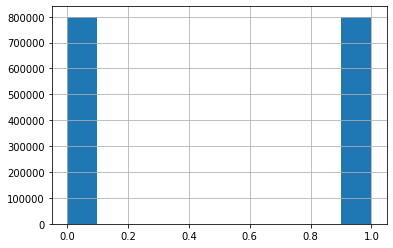

In [40]:
data['sentiment'].hist()

In [47]:
data

,text,sentiment
0,@kashiiagvk welcome back to the land of the li...,1
1,i do not like britney's rock me in,0
2,"@bren3gold Hiya Brenda! My Friday was long, b...",1
3,Finished 100 out of 131 questions for AP Euro....,0
4,Had to get up early this morn 'cos of an appt....,0
...,...,...
1599995,@llofte here I thought you really liked racing...,0
1599996,is getting ready for bed - so sick! so tired! ...,0
1599997,@DakotaFanning9 it was great but the first one...,1
1599998,@beautiful_alone I sure owe you a drink now,1


In [65]:
# Train and Validation Split
msk = np.random.rand(len(data)) < 0.8
train_data = data[msk]
val_data = data[~msk]

In [67]:
# Create datasets (Only take up to 150 words for memory)
train_text = train_data['text'].tolist()
train_text = [' '.join(t.split()[0:150]) for t in train_text]
train_text = np.array(train_text, dtype=object)[:, np.newaxis]
train_label = train_data['sentiment']

val_text = val_data['text'].tolist()
val_text = [' '.join(t.split()[0:150]) for t in val_text]
val_text = np.array(val_text, dtype=object)[:, np.newaxis]
val_label = val_data['sentiment']

In [68]:
print(len(train_text), len(train_label))
print(len(val_text), len(val_label))

1279858 1279858
320142 320142


In [91]:
train_text

array([["@kashiiagvk welcome back to the land of the living. A few heavy meals and you'll get some meat back on those bones. Relax, eat and sleep"],
       ["i do not like britney's rock me in"],
       ['@bren3gold Hiya Brenda! My Friday was long, but pretty great. How was yours? Are you having a nice weekend?'],
       ...,
       ['@DakotaFanning9 it was great but the first one is still the best I think'],
       ['@beautiful_alone I sure owe you a drink now'],
       ['@stillsoul OH! How sweet you are Love your new pic btw!']],
      dtype=object)

In [76]:
train_text[0].shape

(1,)

In [85]:
tf.convert_to_tensor(["the cat is on the mat", "dogs are in the fog"])

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'the cat is on the mat', b'dogs are in the fog'], dtype=object)>

In [70]:
set(train_label)

{0, 1}

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
import tensorflow_hub as hub

In [ ]:
USE = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=False)

In [92]:
# This is useful to debug the issues with input shape: https://github.com/tensorflow/hub/issues/526
input_text = Input(shape=(), name='sent1',dtype=tf.string)
embedding = USE(input_text)
# dense1 = Dense(256, activation='relu')(embedding)
# dropout1 = Dropout(0.2)(dense1)
# dense2 = Dense(100, activation='relu')(dropout1)
dense2 = Dense(100, activation='relu')(embedding)
dropout2 = Dropout(0.2)(dense2)
pred = Dense(2, activation='softmax')(dropout2)
model = Model(inputs=[input_text], outputs=pred)

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, dpi=100)

loss = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sent1 (InputLayer)           [(None,)]                 0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense_2 (Dense)              (None, 100)               51300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 256,849,326
Trainable params: 51,502
Non-trainable params: 256,797,824
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [62]:
model.predict(tf.convert_to_tensor(["the cat is on the mat", "dogs are in the fog"]))

array([[0.47256   , 0.52744   ],
       [0.5079301 , 0.49206993]], dtype=float32)

In [63]:
# from tensorflow.keras.callbacks import EarlyStopping
# # If validation error does not improve for 10 epochs, then terminate the training
# es = EarlyStopping(min_delta=0,patience=3)

# from tensorflow.keras.callbacks import ModelCheckpoint
# # add a checkpoint to save the lowest validation loss
# filepath = '.'
# checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
#                              save_best_only=True, save_weights_only=False, 
#                              mode='auto', save_frequency=1)

In [94]:
BATCH_SIZE = 64
EPOCHS = 10
history = model.fit(
    tf.convert_to_tensor(train_text), train_label,
    validation_data=(val_text, val_label),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS#,
    #callbacks=[es, checkpoint]    
    )

ValueError: Error when checking input: expected sent1 to have 1 dimensions, but got array with shape (1279858, 1)